In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

In [2]:
class AgentState(TypedDict):
    name: str
    guesses: List[int]
    attempts: int
    target: int
    hint: str
    lower_bound: int
    upper_bound: int


In [3]:
def setup_node(state: AgentState) -> AgentState:
    print(f"Welcome {state['name']} to the Number Guessing Game!")
    state['target'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['attempts'] = 0
    state['hint'] = f"Guess a number between {state['lower_bound']} and {state['upper_bound']}."
    state['guesses'] = []
    return state

def guess_node(state: AgentState) -> AgentState:
    possible_guess = [i for i in range(state['lower_bound'], state['upper_bound'] + 1) if i not in state['guesses']]
    if possible_guess:
        guess = random.choice(possible_guess)
    else:
        guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    state['attempts'] += 1
    print(f"{state['name']} guesses: {guess}")
    return state

def hint_node(state: AgentState) -> AgentState:
    last_guess = state['guesses'][-1]
    if last_guess < state['target']:
        state['hint'] = "Too low!"
        state['lower_bound'] = max(state['lower_bound'], last_guess + 1)
        print(state['hint'])
    elif last_guess > state['target']:
        state['hint'] = "Too high!"
        state['upper_bound'] = min(state['upper_bound'], last_guess - 1)
        print(state['hint'])
    else:
        state['hint'] = "Correct!"
        print(state['hint'])
    print(state['hint'])
    return state

def should_continue(state: AgentState) -> str:
    latest_guess = state['guesses'][-1]
    if latest_guess == state['target']:
        print(f"Congratulations {state['name']}! You've guessed the number {state['target']} in {state['attempts']} attempts.")
        return "end"
    elif state['attempts'] >= 7:
        print(f"Sorry {state['name']}, you've used all your attempts. The correct number was {state['target']}.")
        return "end"
    else:
        print(f"Continue : [{state['attempts']}/7] used\n{state['hint']}")
        return "continue"

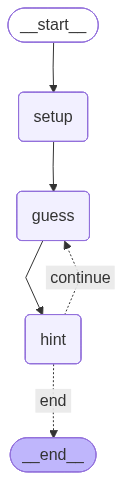

In [5]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges("hint", should_continue, {
    "continue": "guess",
    "end": END
})

graph.set_entry_point("setup")
app = graph.compile()
app 

In [7]:
app.invoke(AgentState(name="Bob", lower_bound = 1, upper_bound = 20))

Welcome Bob to the Number Guessing Game!
Bob guesses: 9
Too high!
Too high!
Continue : [1/7] used
Too high!
Bob guesses: 4
Too low!
Too low!
Continue : [2/7] used
Too low!
Bob guesses: 5
Too low!
Too low!
Continue : [3/7] used
Too low!
Bob guesses: 8
Too high!
Too high!
Continue : [4/7] used
Too high!
Bob guesses: 7
Too high!
Too high!
Continue : [5/7] used
Too high!
Bob guesses: 6
Correct!
Correct!
Congratulations Bob! You've guessed the number 6 in 6 attempts.


{'name': 'Bob',
 'guesses': [9, 4, 5, 8, 7, 6],
 'attempts': 6,
 'target': 6,
 'hint': 'Correct!',
 'lower_bound': 6,
 'upper_bound': 6}